# Chem 30324, Spring 2024, Homework 5
# Due March 4, 2024

## Real-world particle-in-a-box.
### A one-dimensional particle-in-a-box is a simple but plausible model for the π electrons of a conjugated alkene, like butadiene ($C_4H_6$, shown here). Suppose all the C–C bonds in a polyene are 1.4 Å long and the polyenes are perfectly linear.
<img src="HW5-1.png">

### 1. Plot out the energies of the $n = 1 – 6$ particle-in-a-box states for ethylene (2 carbon chain), butadiene (4 carbon chain), hexatriene (6 carbon chain), octatetraene (8 carbon chain), and decapentaene (10 carbon chain). What happens to the spacing between energy levels as the molecule gets longer? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

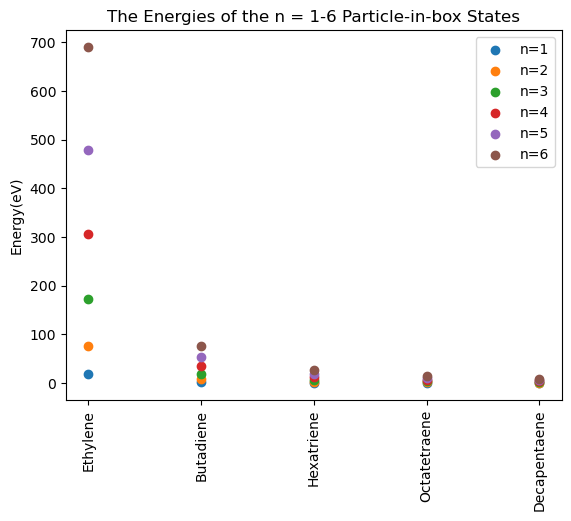

In [3]:

h_bar = 1.05457e-34 #J*s, h bar being h/2*pi
m_e = 9.10938215e-31 #kg
l = 1.4e-10 #m

def E(n,num):
    return ((n**2*np.pi**2*h_bar**2)/(2*m_e*(l*(num-1))**2)*6.2415e18)
    # Converted to eV, gives energy for n state with num number of carbon atoms
    # Number of bonds is one less than the number of atoms

num = [2,4,6,8,10]
n1,n2,n3,n4,n5,n6 = [],[],[],[],[],[]

for i in num: # i runs over the list num, contains number of C atoms in each molecule
    n1.append(E(1,i))
    n2.append(E(2,i))
    n3.append(E(3,i))
    n4.append(E(4,i))
    n5.append(E(5,i))
    n6.append(E(6,i))

i = 1
for n in [n1,n2,n3,n4,n5,n6]:
    plt.scatter(num,n,label='n={}'.format(i)) # x-axis is the number of carbons in a molecule, y-axis is energy
    i+=1
legend = plt.legend()   
labels = ['Ethylene', 'Butadiene', 'Hexatriene', 'Octatetraene','Decapentaene']
plt.xticks(num, labels, rotation='vertical')
plt.ylabel('Energy(eV)')
plt.title('The Energies of the n = 1-6 Particle-in-box States')
plt.show()

As the molecule gets longer, the spacing between the energy levels decreases rapidly.

### 2. Plot out the normalized $n = 2$ particle-in-a-box wavefunction for an electron in butadiene and the normalized $n = 2$ probability distribution. Indicate on the plots the most probable location(s) of the electron, the average location of the electron, and the positions of any nodes.

Text(1.5, -0.3, 'node average \n location')

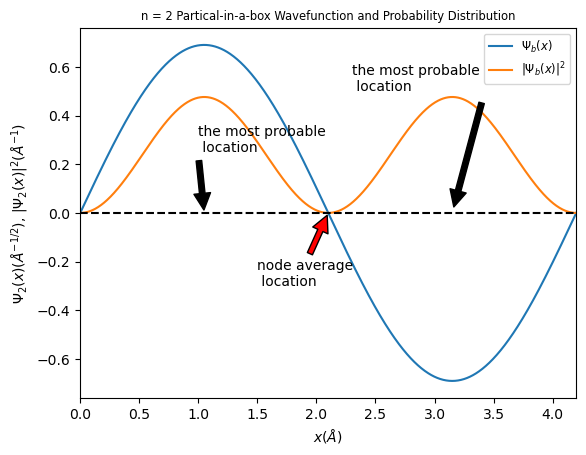

In [4]:
L = 3*1.4 # Butadiene has four C atoms, so three bonds; scale is Angstrom
n = 2
x = np.linspace(0,L,1000)

def psi_but(x):
    return np.sqrt(2/L)*np.sin((n*np.pi*x)/L) # Normalized Wavefunction

psi = psi_but(x)
plt.plot(x,psi,label='$\Psi_b(x)$')
plt.plot(x,psi**2,label='$|\Psi_b(x)|^2$') #Probability is the wavefunction times its conjugate, no imaginary part so the wavefunction squared

plt.legend(fontsize = 'small')
plt.xlim(0,L)
plt.xlabel('$x(\AA)$')
plt.ylabel('$\Psi_2(x)(\AA^{-1/2})$, $|\Psi_2(x)|^2(\AA^{-1})$')
plt.title('n = 2 Partical-in-a-box Wavefunction and Probability Distribution',fontsize = 'small')
plt.axhline(y=0,color='k',linestyle='--') # draw a horizontal dash line

plt.annotate('the most probable \n location', xy=(L/4, 0), xytext=(1.0, 0.25), arrowprops=dict(facecolor='black', shrink=0.05)) # add annotations
plt.annotate('the most probable \n location', xy=(3*L/4, 0), xytext=(2.3, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('node average \n location', xy=(L/2, 0), xytext=(1.5, -0.3), arrowprops=dict(facecolor='red', shrink=0.05))

### 3. Butadiene has 4 π electrons, and we will learn later that in its lowest energy state, two of these are in the $n = 1$ and two in the $n = 2$ levels. Compare the wavelength of light (in nm) necessary to promote (“excite”) one electron from either of these levels to the empty $n = 3$ level.

$E = hc/\lambda$, so rearranging we get $\lambda = hc/E$

In [5]:
E_32 = (n3[1]-n2[1]) #indexing the energy lists for the second value, that of butadiene
E_31 = (n3[1]-n1[1])

hc = 1240# eV*nm

lamb_32 = (hc)/E_32
lamb_31 = (hc)/E_31

print('The wavelength of light needed to transition from n=1 to n=3 is {0:.2f}nm'.format(lamb_31))
print('The wavelength of light needed to transition from n=2 to n=3 is {0:.2f}nm'.format(lamb_32))

The wavelength of light needed to transition from n=1 to n=3 is 72.71nm
The wavelength of light needed to transition from n=2 to n=3 is 116.34nm


### 4. The probability of an electron jumping between two energy states by emitting or absorbing light is proportional to the square of the “transition dipole,” given by the integral $\lvert\langle\psi_{initial}\lvert \hat{x}\rvert\psi_{final}\rangle\rvert^2$. Contrast the relative probabilities of an electron jumping from $n = 1$ to $n = 3$ and from $n = 2$ to $n = 3$ levels. Can you propose any general rules about “allowed” and "forbidden" jumps?

In [6]:
from sympy import * # import sympy for symbolic mathematics
#Simplified integrals with wavefunctions not normalized, l = 1

l=1 # m

x = symbols('x')
a = integrate((sin(np.pi*(x/l))*x*sin(3*np.pi*(x/l))),(x,0,l))
print('Probability of transition from n=1 to n=3 is', a**2)
b = integrate((sin(2*np.pi*(x/l))*x*sin(3*np.pi*(x/l))),(x,0,l))
print('Probability of transition from n=2 to n=3 is', b**2)

Probability of transition from n=1 to n=3 is 0
Probability of transition from n=2 to n=3 is 0.00946112924591708


The probability of jumping from n=1 to n=3 is 0, so it can be assumed that it is forbidden, while jumping from n=2 to n=3 is allowed since there is a non-zero number here. More generally these rules apply based on the difference between the two energy states, with an even difference $(\Delta n=2)$ being forbidden while odd differences $(\Delta n=1)$ are allowed.

$ \int_{0}^{L} sin(\frac{n\pi x}{L})*x*sin(\frac{m\pi x}{L}) \,dx = \left \{
  \begin{array}{lr} 
    0 & n-m = 2x \\
    > 0 & n-m \neq 2x 
      \end{array}
\right.
$

### 5. Consider the reaction of two ethylene molecules to form butadiene:
<img src="HW5-2.png">

### As a very simple estimate, you could take the energy of each molecule as the sum of the energies of its π electrons, allowing only two electrons per energy level. Again taking each C—C bond as 1.4 Å long and treating the π electrons as particles in a box, calculate the total energy of an ethylene and a butadiene molecule within this model (in kJ/mol), and from these calculate the net reaction energy. Compare your results to the experimental reaction enthalpy. How well did the model do?

In [7]:
l=1.4e-10# m, length of one C-C bond

def E(n,num):
    return ((n**2*np.pi**2*h_bar**2)/(2*m_e*(l*(num-1))**2)*6.0221e20)# Redefined so that the unit is kJ/mol

E_eth = 2*E(1,2)
E_but = 2*E(1,4) + 2*E(2,4)
E_net = E_but - 2*E_eth
print('\nInitial energy is', E_eth, 'kJ/mol','\nFinal energy is', E_but, 'kJ/mol' ,'\nNet energy is', E_net, 'kJ/mol')
# Experimental enthalpy of formation data from NIST
Ef_ethylene = 52.4 # kJ/mol
Ef_butadiene = 108.8 # kJ/mol
E_reaction = Ef_butadiene - 2*Ef_ethylene # kJ/mol
print('The experimental reaction enthalpy is {:.1f}kJ/mol.'.format(E_reaction))


Initial energy is 3702.145987248957 kJ/mol 
Final energy is 2056.747770693865 kJ/mol 
Net energy is -5347.544203804049 kJ/mol
The experimental reaction enthalpy is 4.0kJ/mol.


Model does not really work for this at all. $\sigma$ bonds are neglected and the infinite potential well is non-physical.

### 6. This particle-in-a-box model has many flaws, not the least of which is that the ends of the polyene “box” are not infinitely high potential walls. In a somewhat better model the π electrons would travel in a finite-depth potential well. State two things that would change from the infinite depth to the finite depth model.

1. Electrons have a finite probability of going past the ending C atoms.
2. Energy levels decrease in energy.
3. States with high enough energies leave the well completely, meaning only a finite number of energy states are bound.